In [29]:
import os
import numpy as np
import h5py
import glob
import itertools
import sys
from sklearn.utils import shuffle
import glob

In [30]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [31]:
from sklearn.utils import shuffle
fileIN = shuffle(glob.glob("../data/training/qcd*SIDEBAND*.h5"), random_state=1111)
i_test = int(0.75*len(fileIN))
X_val = fileIN[i_test:]

In [32]:
X = np.array([])
for fName in X_val:
    f = h5py.File(fName, "r")
    myX =  np.array(f.get('EFP'))
    myX =  np.concatenate((myX[:,:,0], myX[:,:,1]))
    myX = shuffle(myX)
    X = np.concatenate((X, myX)) if X.size else myX
print(X.shape)

(35152, 102)


In [33]:
# import the model
nameModel = "AE_EFP"
from keras.models import model_from_json
json_file = open('../models/%s.json' %nameModel)
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("../models/%s.h5" %nameModel)
print("Loaded model from disk")
for l in model.layers: 
    l.trainable=False
model.summary()

Loaded model from disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 102)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 102)               408       
_________________________________________________________________
enc_0 (Dense)                (None, 50)                5150      
_________________________________________________________________
enc_1 (Dense)                (None, 25)                1275      
_________________________________________________________________
enc_2 (Dense)                (None, 10)                260       
_________________________________________________________________
dec_0 (Dense)                (None, 25)                275       
_________________________________________________________________
dec_1 (Dense)                (None, 50)              

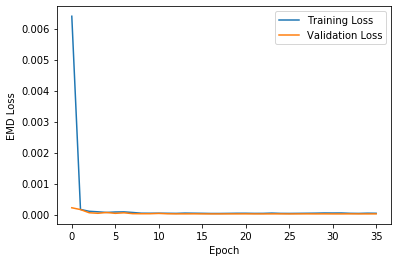

In [34]:
# traininig history
history = h5py.File("../models/%s_history.h5" %nameModel)
training_loss = history.get("training_loss")
validation_loss = history.get("validation_loss")
epochs = np.array(range(len(training_loss)))
# compare prediction to true value
plt.plot(epochs, training_loss, label="Training Loss")
plt.plot(epochs, validation_loss, label="Validation Loss")
plt.ylabel('EMD Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [35]:
Xhat = model.predict(X)

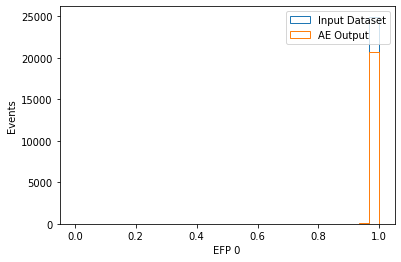

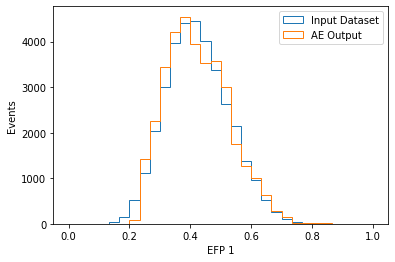

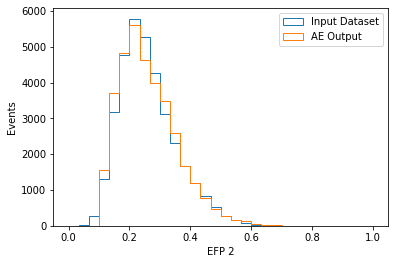

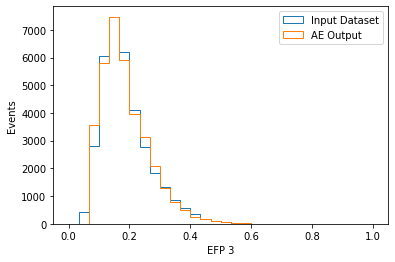

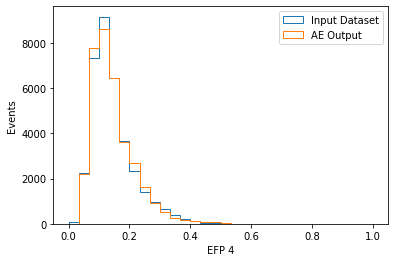

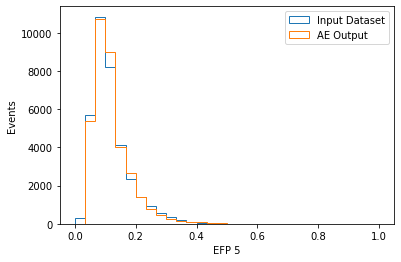

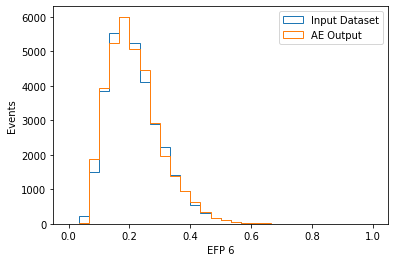

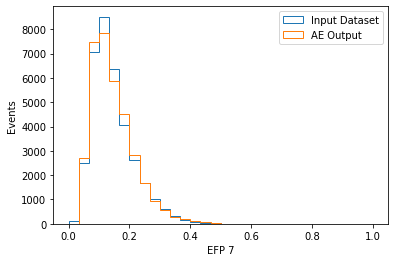

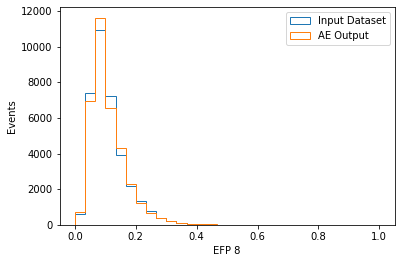

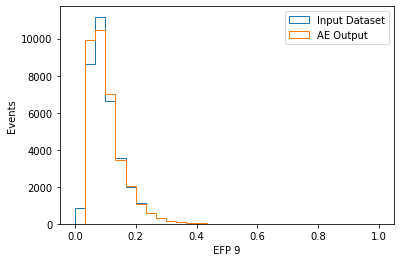

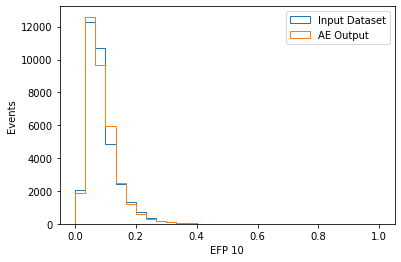

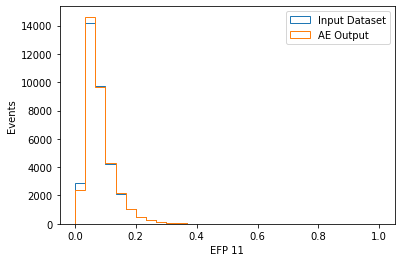

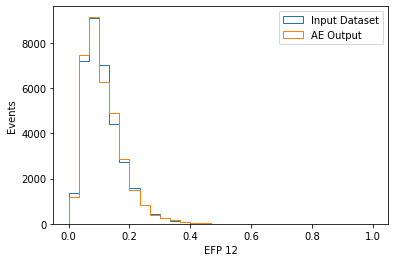

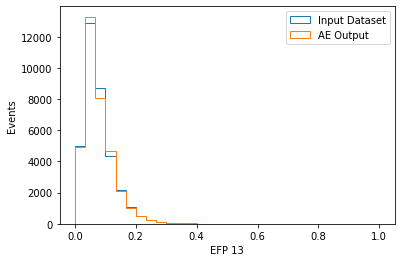

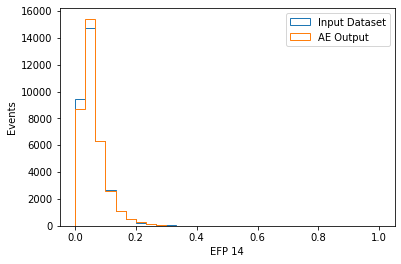

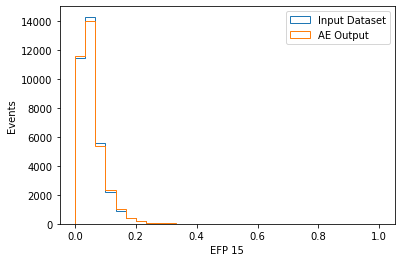

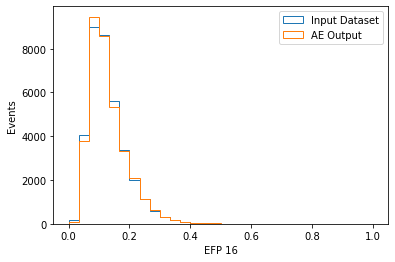

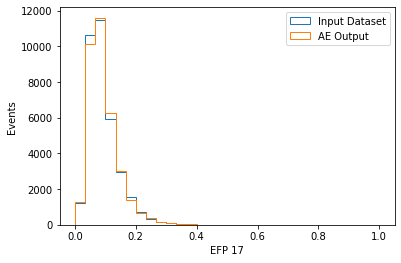

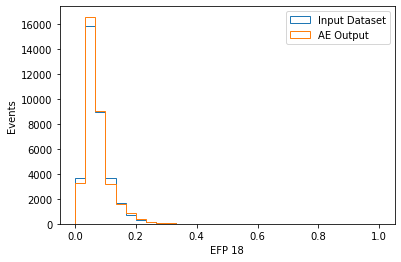

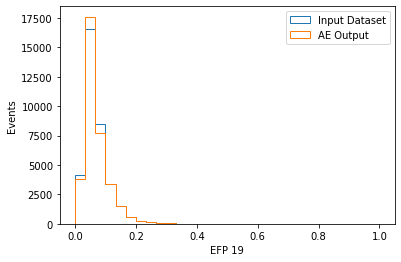

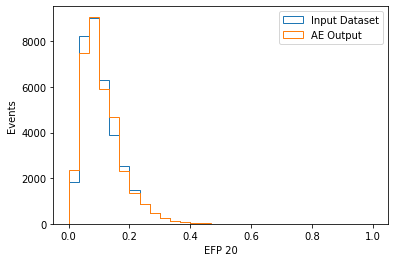

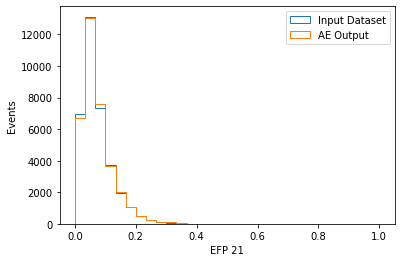

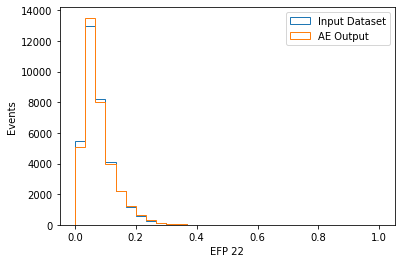

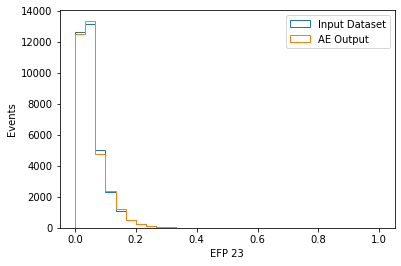

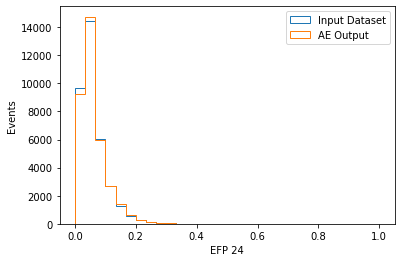

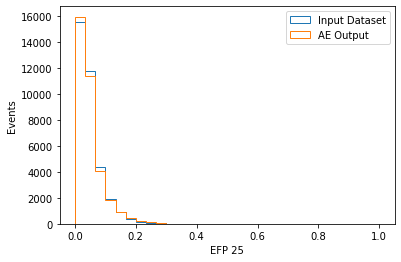

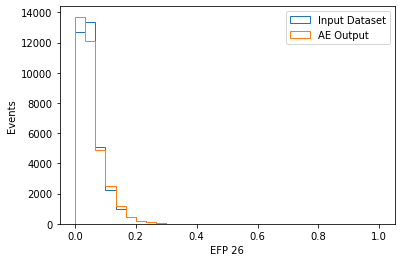

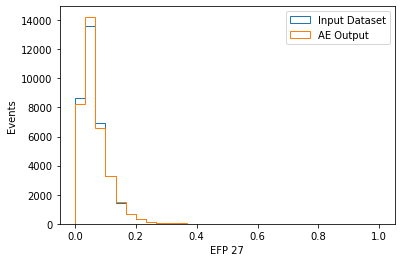

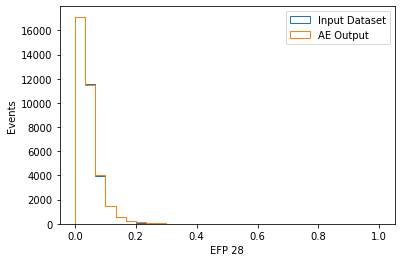

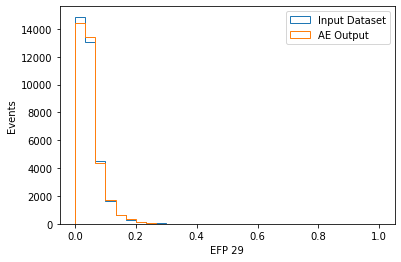

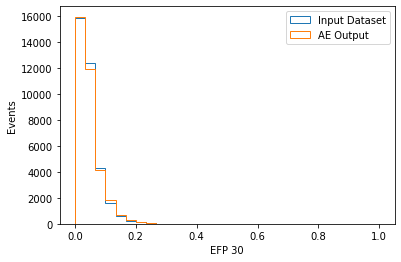

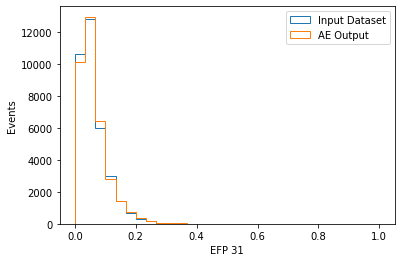

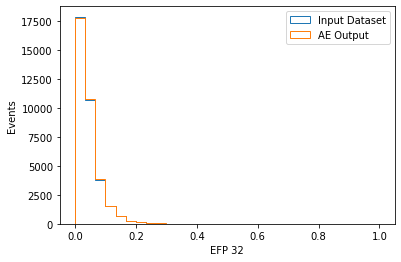

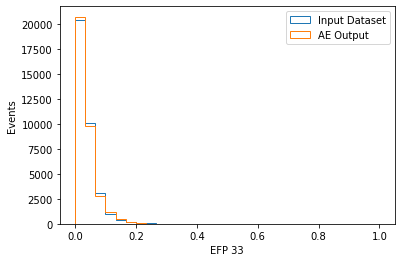

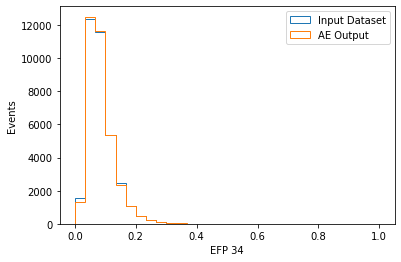

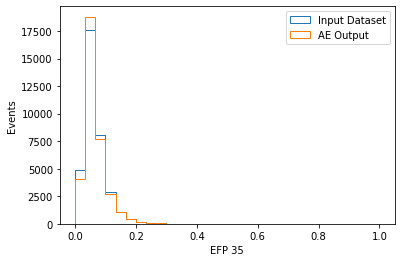

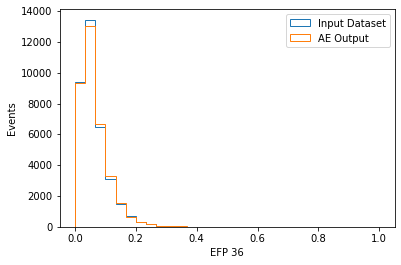

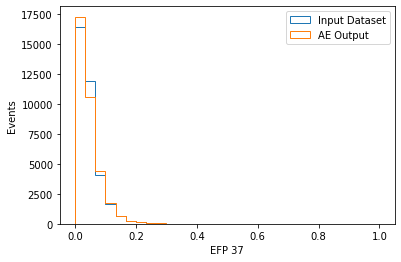

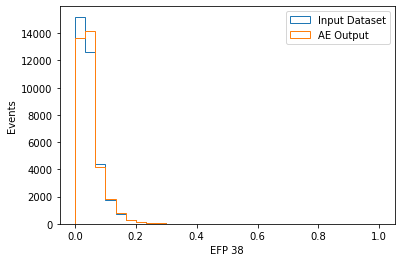

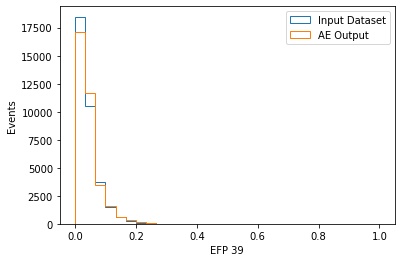

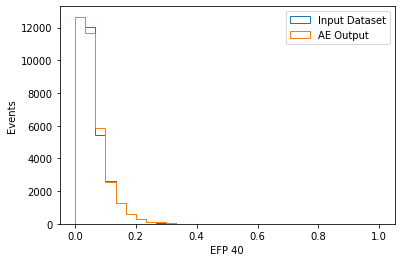

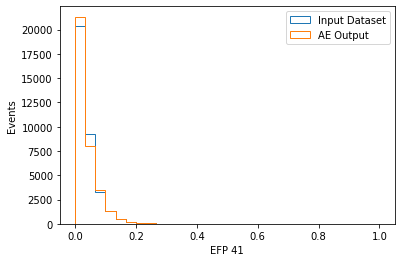

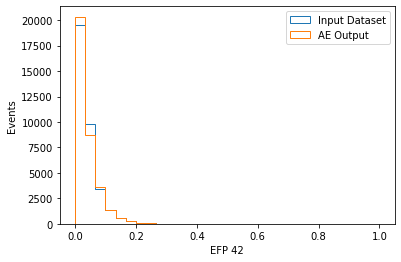

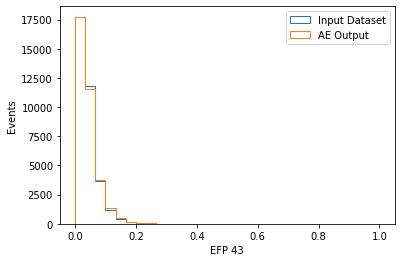

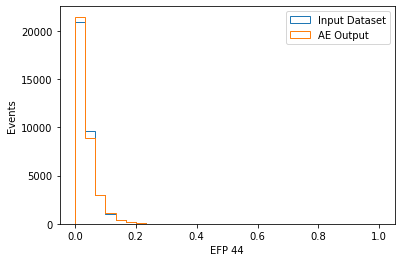

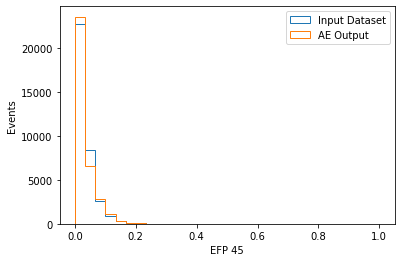

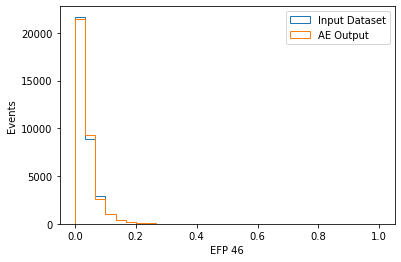

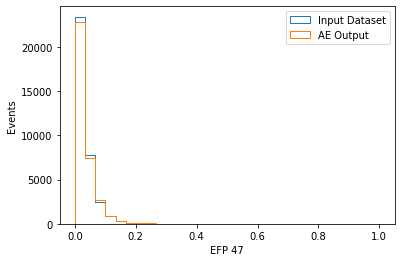

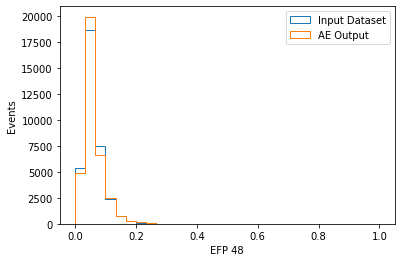

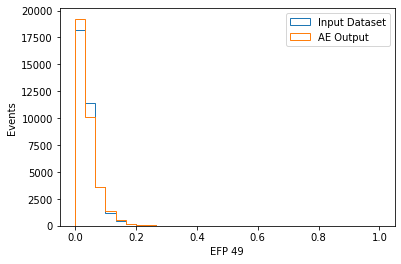

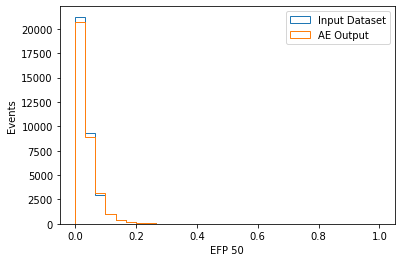

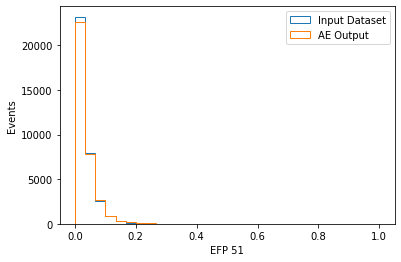

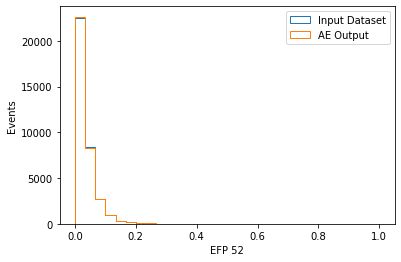

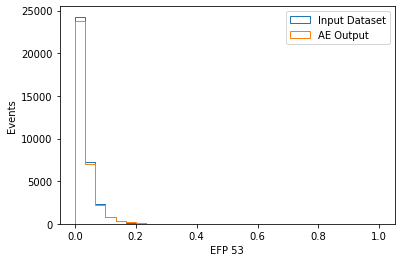

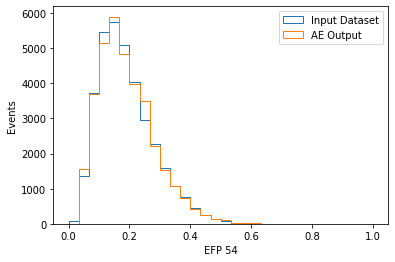

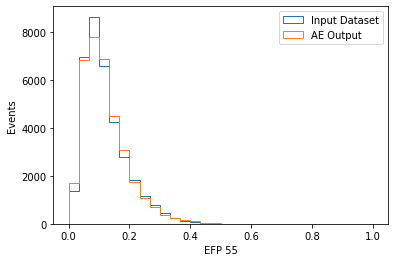

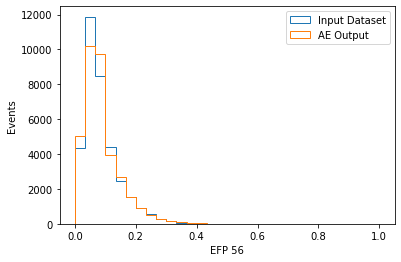

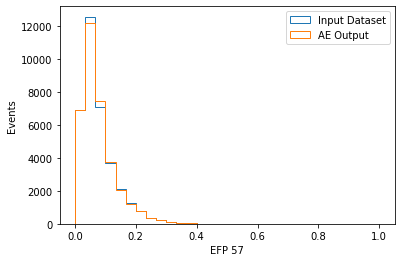

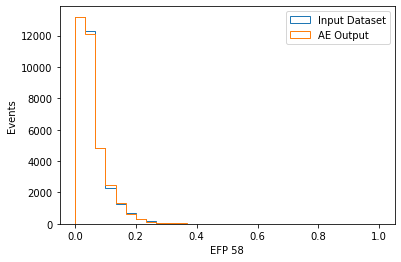

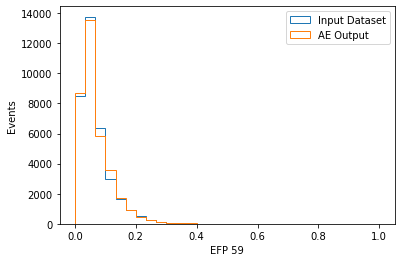

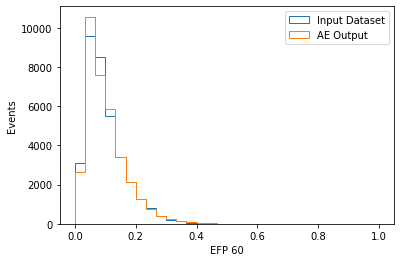

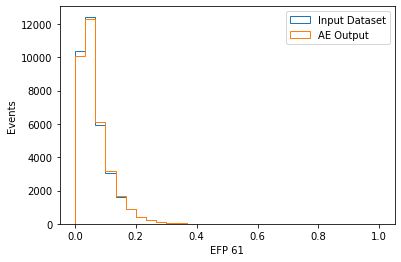

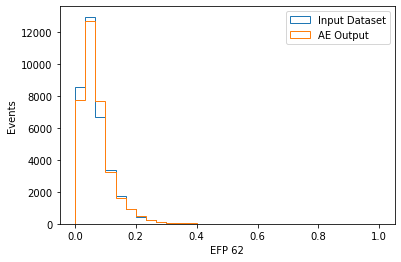

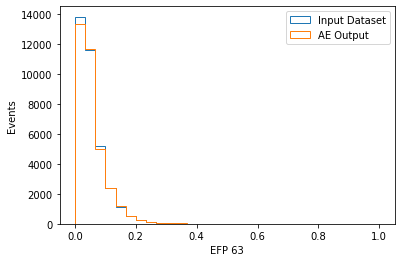

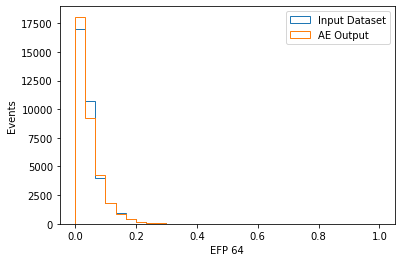

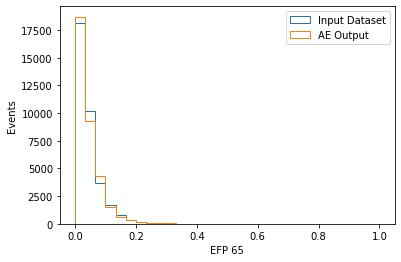

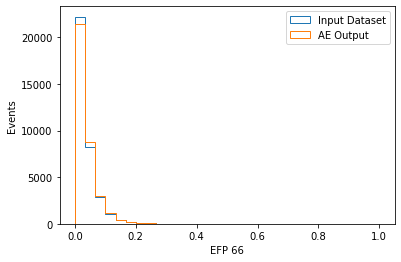

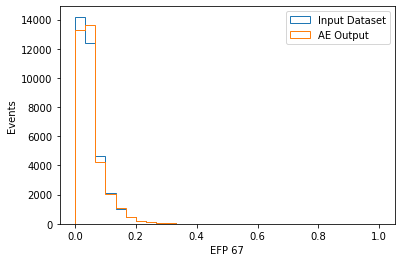

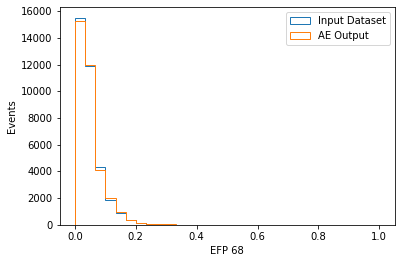

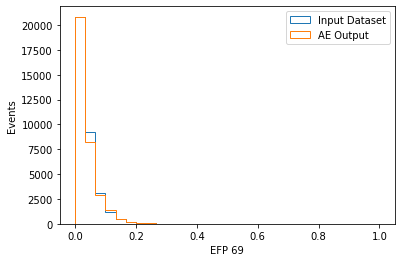

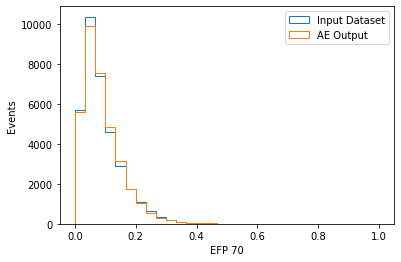

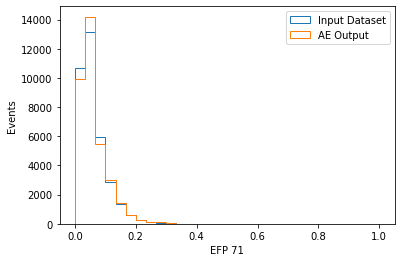

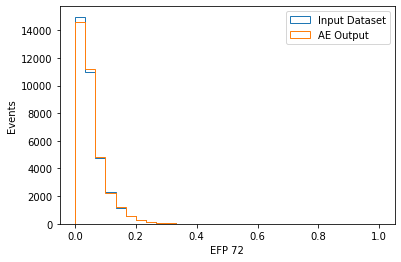

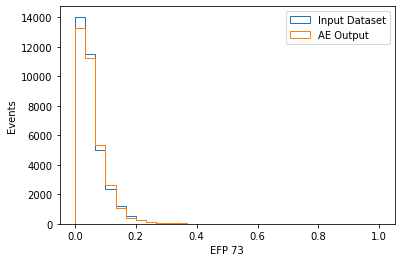

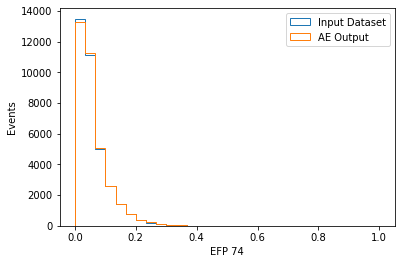

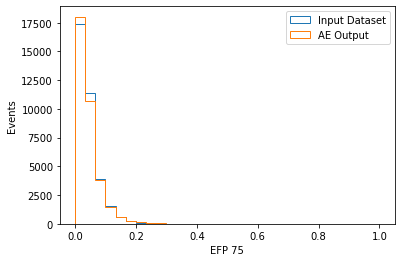

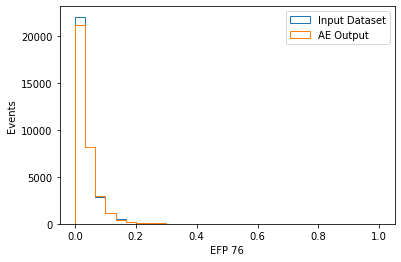

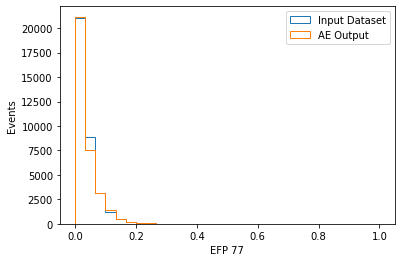

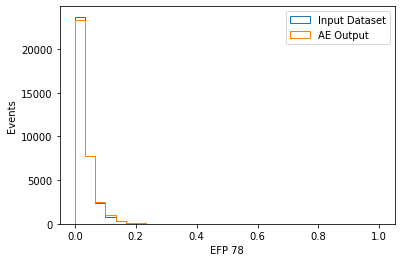

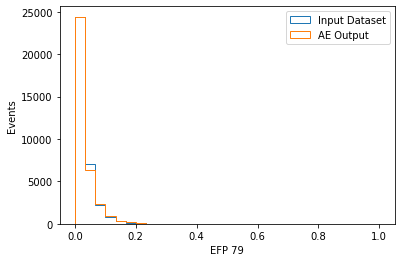

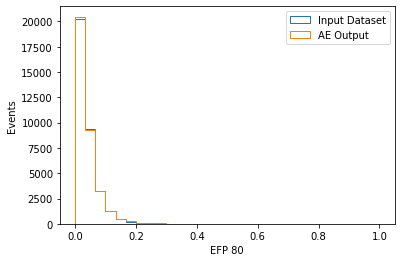

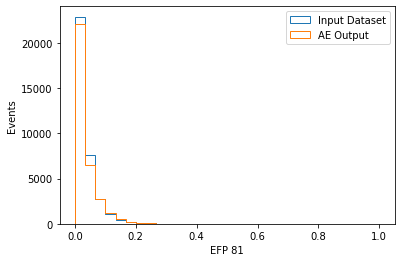

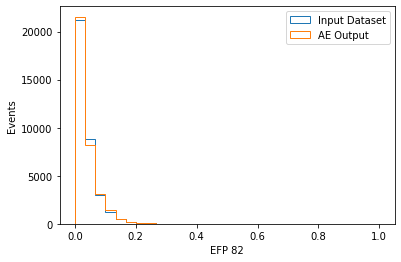

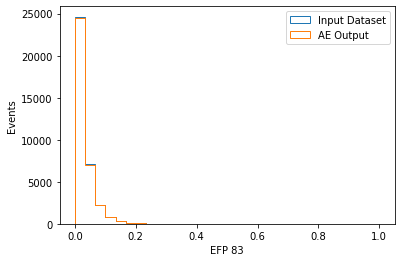

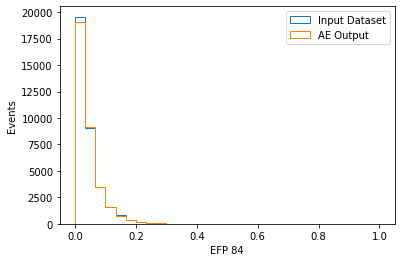

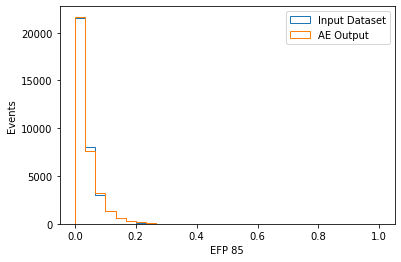

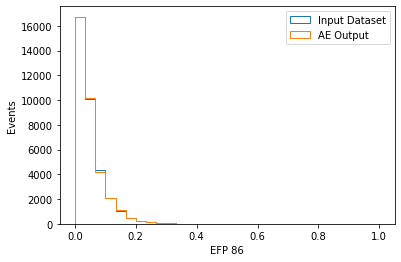

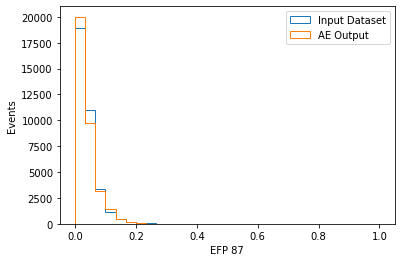

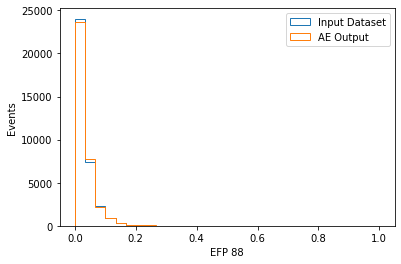

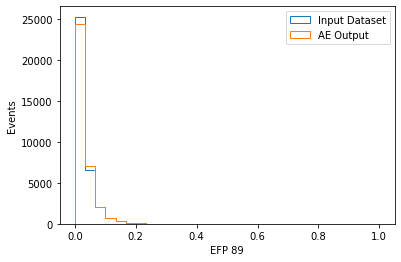

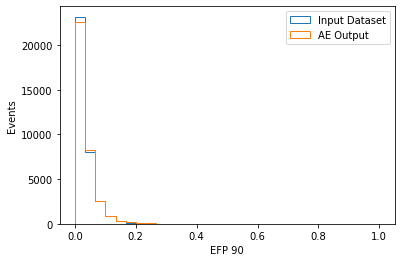

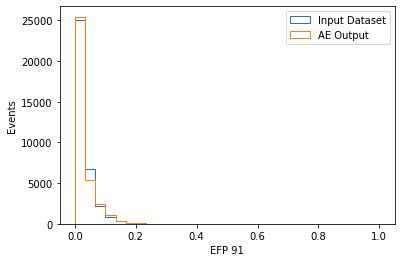

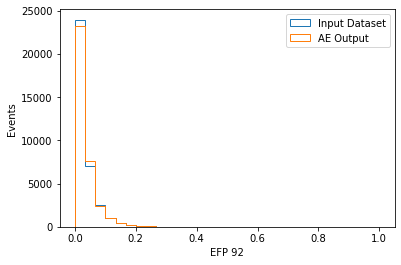

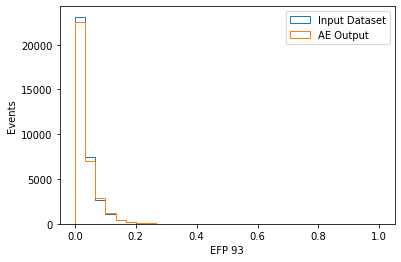

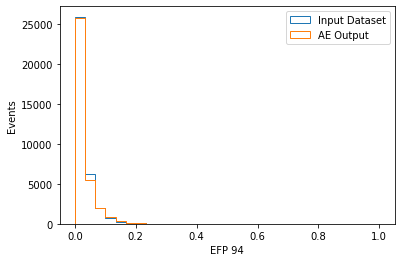

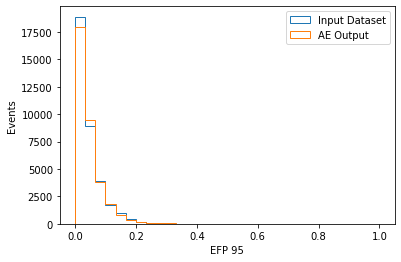

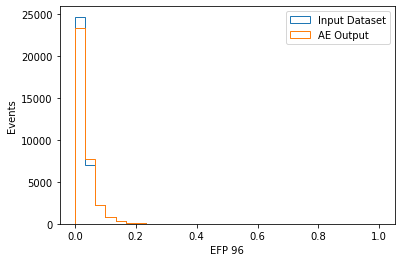

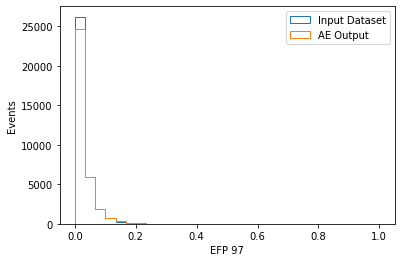

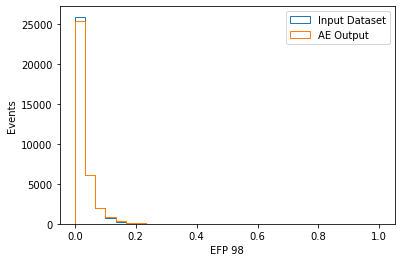

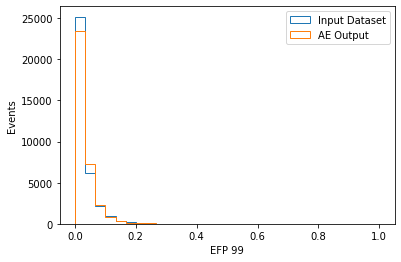

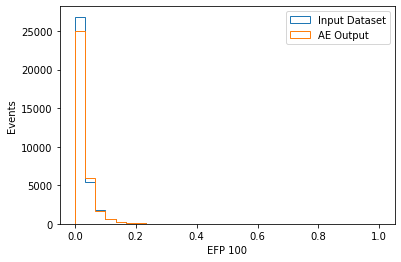

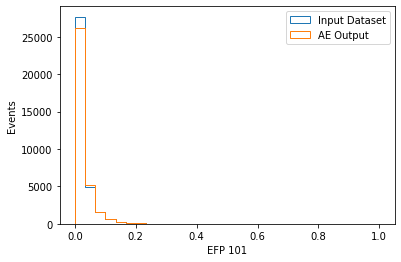

In [36]:
for i in range(102):
    plt.hist(X[:,i], bins=30, range=(0.,1.), histtype="step", label="Input Dataset")
    plt.hist(Xhat[:,i], bins=30, range=(0.,1.), histtype="step", label="AE Output")
    plt.ylabel('Events')
    plt.xlabel('EFP %i' %i)
    plt.legend()
    plt.show()

In [37]:
# loss function
def mse_loss(Xin, Xout):
    mse = (Xin-Xout)*(Xin-Xout)
    mse = np.sum(mse, axis=-1)
    return mse

In [38]:
# loss plot
loss_QCD = mse_loss(X, Xhat)

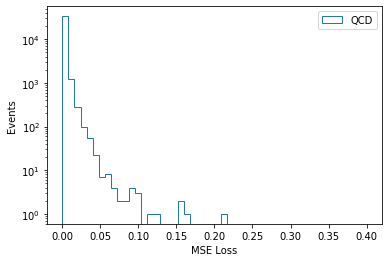

In [39]:
plt.hist(loss_QCD, bins=50, range=(0., 0.4), histtype="step", label="QCD")
plt.ylabel('Events')
plt.xlabel('MSE Loss')
plt.legend()
plt.semilogy()
plt.show()